## <p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Market Basket Analysis</p>

Market Basket Analysis is a powerful tool for translating vast amounts of customer transaction and viewing data into simple rules for product promotion and recommendation.

**In this project we are going to find the most common and general rules for a Groceries Store. In order to make recommendations to put together certain products and offers.**


<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LIST OF CONTENTS</p>   

    
* [1. Loading the Data](#1)
    
* [2. Data Cleaning](#2)
    
* [3. Exploratory Data Analysis](#3)
    
* [4. Market Basket Analysis](#4)
    
* [5. Conclusions](#5)
    
* [6. Recommendations](#6)

<a id="1"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING THE DATA</p>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Groceries data.csv')
data.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


<a id="2"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>

### Duplicated Values

In [2]:
data.duplicated().sum()

759

In [3]:
data.drop_duplicates(inplace=True)

In [4]:
data.duplicated().sum()

0

### Null values

In [5]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

### Observation Uniqueness

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38006 non-null  int64 
 1   Date             38006 non-null  object
 2   itemDescription  38006 non-null  object
 3   year             38006 non-null  int64 
 4   month            38006 non-null  int64 
 5   day              38006 non-null  int64 
 6   day_of_week      38006 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.3+ MB


In [7]:
data.itemDescription.value_counts()[:50]

whole milk                  2363
other vegetables            1827
rolls/buns                  1646
soda                        1453
yogurt                      1285
root vegetables             1041
tropical fruit              1014
bottled water                908
sausage                      903
citrus fruit                 795
pastry                       774
pip fruit                    734
shopping bags                712
canned beer                  702
bottled beer                 678
whipped/sour cream           654
newspapers                   582
frankfurter                  565
brown bread                  563
pork                         555
domestic eggs                555
butter                       527
fruit/vegetable juice        509
beef                         508
curd                         504
margarine                    482
coffee                       473
frozen vegetables            419
chicken                      417
white bread                  359
cream chee

In [8]:
data['Member_number'].nunique()

3898

<a id="3"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>

# Product Counts

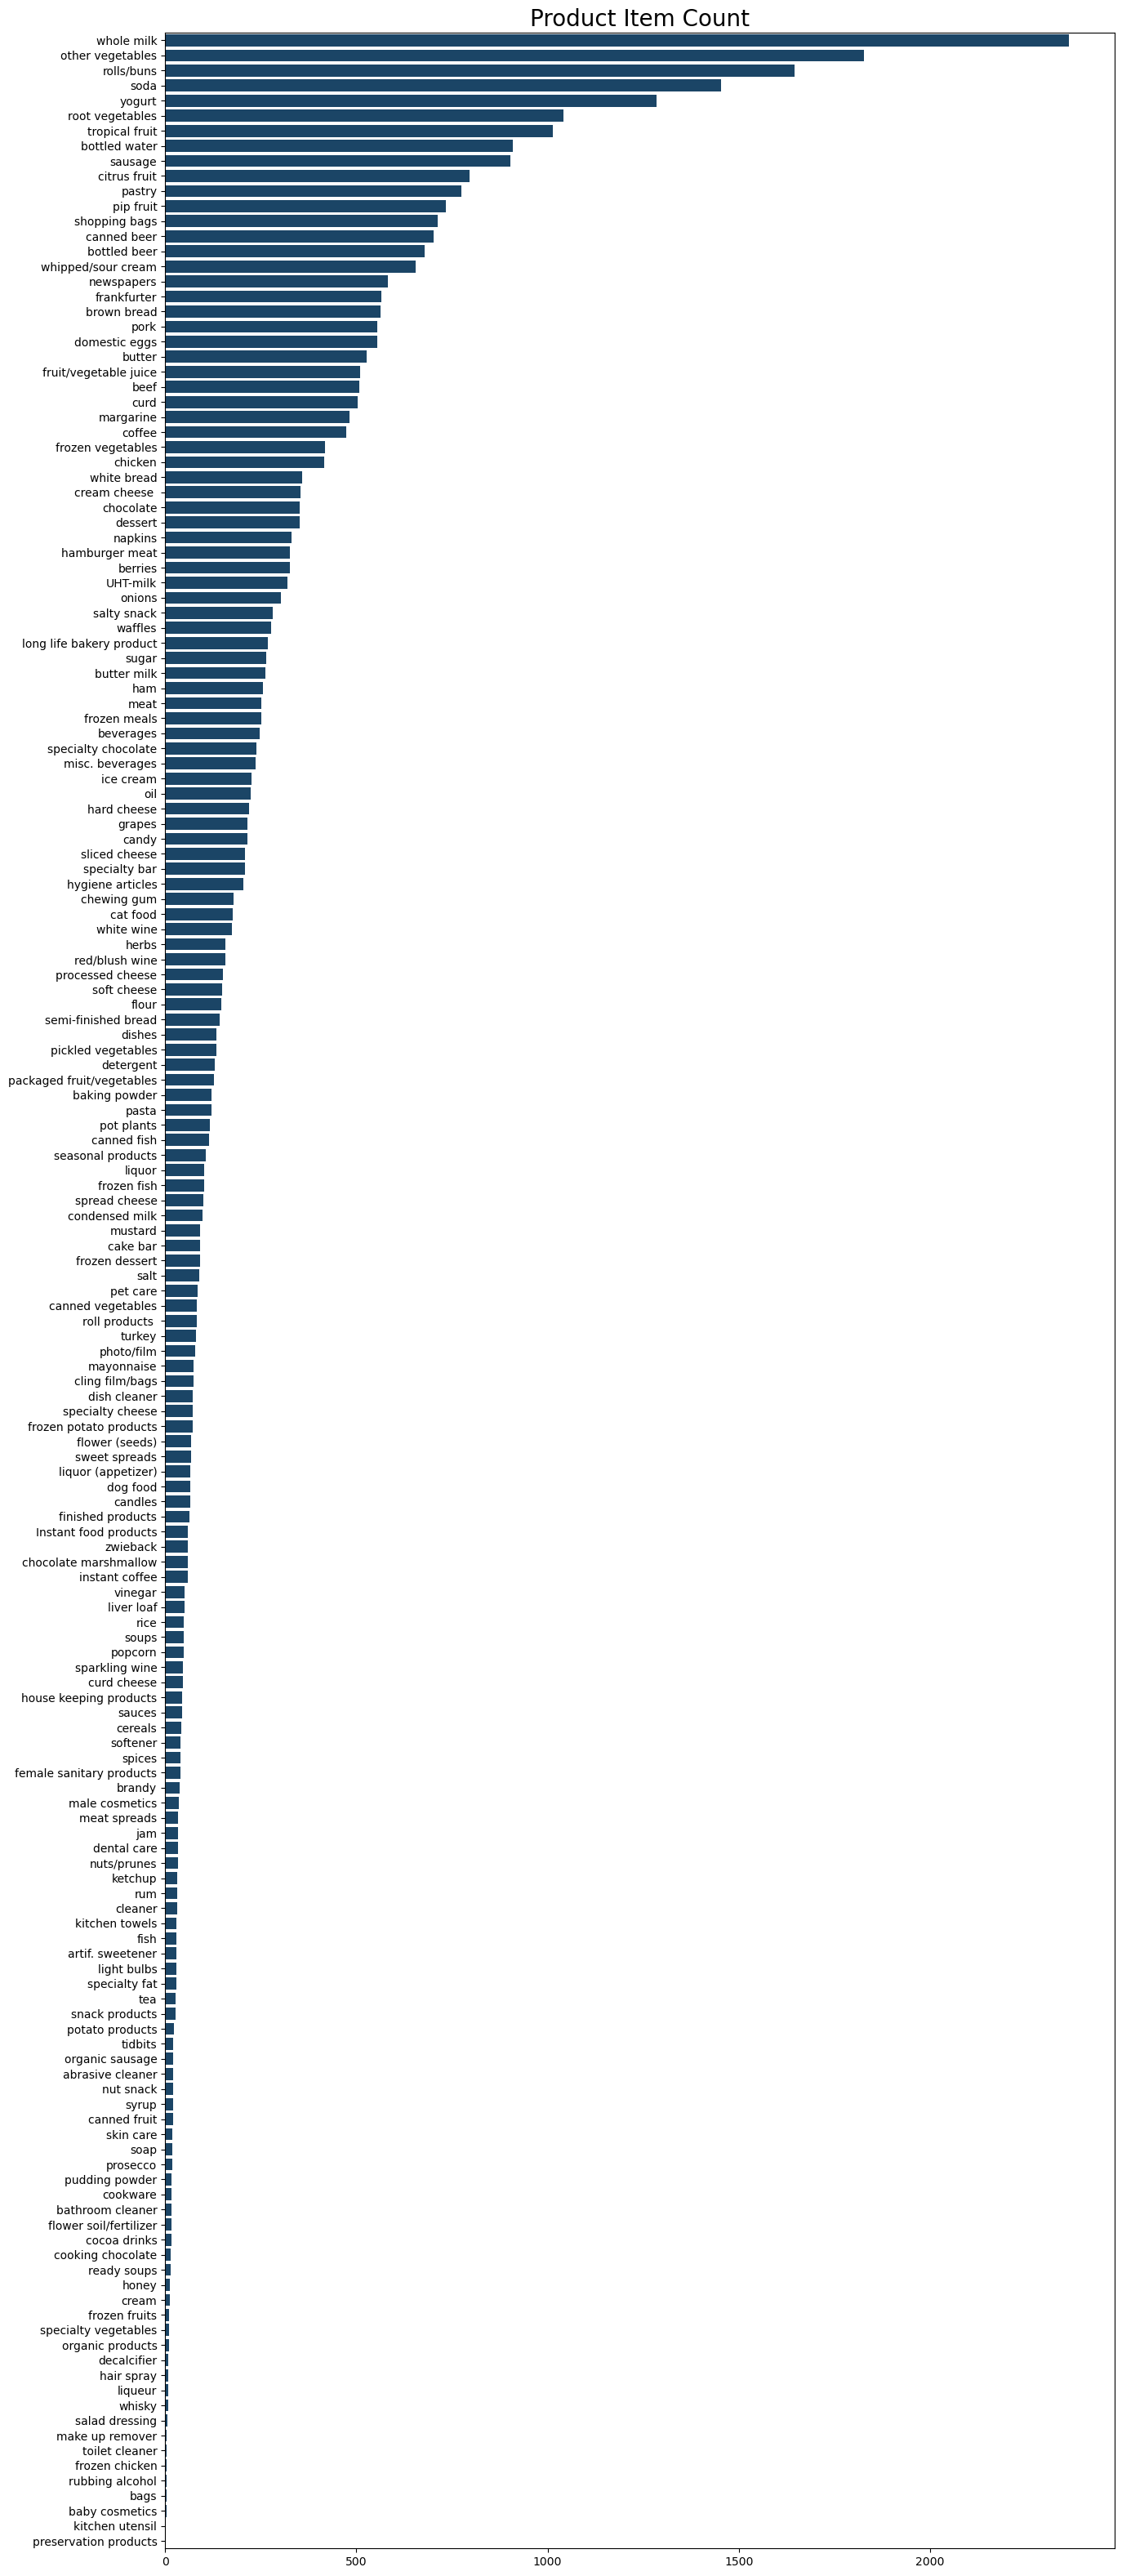

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,40))
sns.barplot(x='size', y='itemDescription', 
              data=data.groupby('itemDescription', as_index=False).size().sort_values(by='size', ascending=False),
              color='#0E4672')
plt.title('Product Item Count', size=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Time Series Analysis
## Overview

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

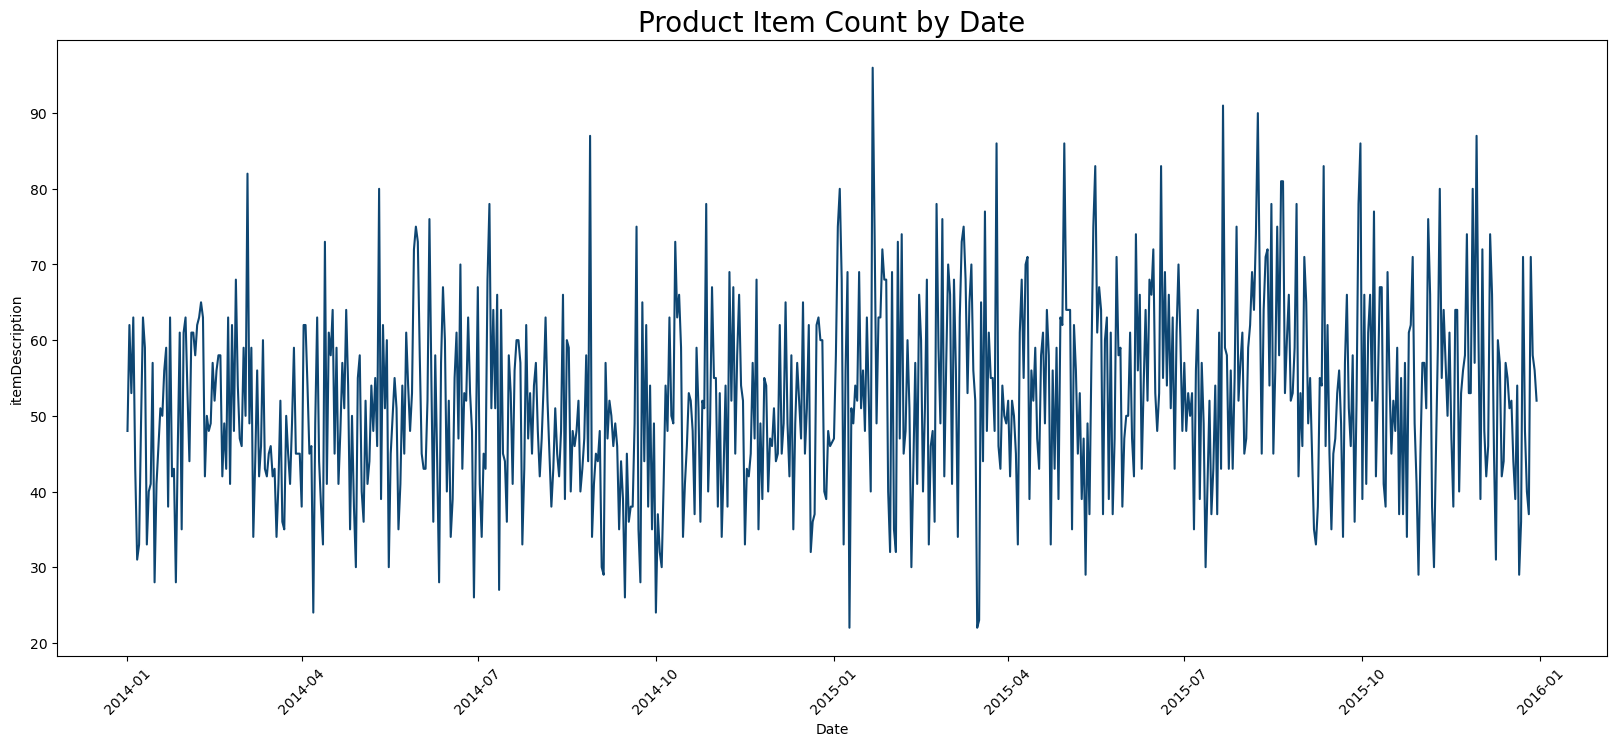

In [11]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='Date', y='itemDescription', data=data.groupby('Date', as_index=False)['itemDescription'].count(), 
             color='#0E4672')
plt.xticks(rotation=45)
plt.title('Product Item Count by Date', size=20)
plt.show()

<a id="4"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MARKET BASKET ANALYSIS</p>

# Preprocess the data for Apriori Algorithm

In [12]:
print("Unique Member Id's:", data['Member_number'].nunique())
print("Unique Product Items:", data['itemDescription'].nunique())


Unique Member Id's: 3898
Unique Product Items: 167


In [13]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Group the transactions by transaction_id and create a list of items for each transaction
transactions = data.groupby('Member_number')['itemDescription'].apply(list)
transactions[:10]

Member_number
1000    [soda, canned beer, sausage, sausage, whole mi...
1001    [frankfurter, frankfurter, beef, sausage, whol...
1002    [tropical fruit, butter milk, butter, frozen v...
1003    [sausage, root vegetables, rolls/buns, deterge...
1004    [other vegetables, pip fruit, root vegetables,...
1005          [whipped/sour cream, rolls/buns, margarine]
1006    [whole milk, frankfurter, chicken, whole milk,...
1008    [hamburger meat, tropical fruit, soda, liquor ...
1009    [herbs, pastry, tropical fruit, yogurt, ketchu...
1010    [pip fruit, frankfurter, pip fruit, bottled wa...
Name: itemDescription, dtype: object

In [14]:
# Create a one-hot encoding of the transactions
te = TransactionEncoder()
# Use the one-hot encoding of the transactions
one_hot = te.fit_transform(transactions)

# Convert the one-hot encoding to a Pandas DataFrame
one_hot_df = pd.DataFrame(one_hot, columns=te.columns_)
one_hot_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
one_hot_df.shape

(3898, 167)

# Apriori Algorithm 

**`Apriori algorithm` is a useful tool for identifying patterns in data and expressing those patterns as relationships between variables. It works by iteratively generating a set of candidate rules and then pruning the set to include only the most important rules. It does this by calculating the support and confidence of each rule, and only keeping the rules that meet a minimum support and confidence threshold.**

* ***`Support`:*** Support is a measure of how often an item or a combination of items appears in the dataset. It helps to identify which items or combinations of items are most common. That means it is the frequency of transactions that contain the Product item.

* ***`Confidence`:*** Confidence is a measure of how reliable an association rule is. It tells you the percentage of times that the SECOND ITEM in a rule (the "consequent") appears when the first item (the "antecedent") appears.

* ***`Lift`:*** Lift is a measure of the strength of the association between two items compared to what you would expect if the two items were independent. It tells you whether the association between the items is stronger or weaker than expected by chance.

In [16]:
# Minimun support of 0.1 which means 10 times in total number of transactions that the item is present in the data.
frequent_itemsets = apriori(one_hot_df, min_support=0.1, use_colnames=True)

# Sort the frequent itemsets by support and print the top 20 itemsets
frequent_itemsets.sort_values('support', ascending=False, inplace=True)
frequent_itemsets

,support,itemsets
27,0.458184,(whole milk)
16,0.376603,(other vegetables)
20,0.349666,(rolls/buns)
24,0.313494,(soda)
28,0.282966,(yogurt)
25,0.233710,(tropical fruit)
21,0.230631,(root vegetables)
2,0.213699,(bottled water)
22,0.206003,(sausage)
32,0.191380,"(whole milk, other vegetables)"


In [17]:
from mlxtend.frequent_patterns import association_rules

# Identify association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
21,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
25,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146
3,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
1,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
17,(tropical fruit),(whole milk),0.233710,0.458184,0.116470,0.498353,1.087672,0.009388,1.080076
19,(root vegetables),(whole milk),0.230631,0.458184,0.113135,0.490545,1.070630,0.007464,1.063522
5,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971
13,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553
8,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197


## Zhang's association strength


**`Zhang's metric` is a useful tool for understanding the strength of the association between two items in a dataset and for identifying patterns that may be relevant to business decisions.**

Note: A higher value for Zhang's metric indicates a stronger association between the two items being analyzed, while a lower value indicates a weaker association. **In market basket analysis, a high Zhang's metric might be considered good because it indicates a strong association between two items that could be leveraged for targeted marketing or sales efforts.**

* A positive value for Zhang's metric indicates a stronger than expected association.
* A negative value indicates a weaker than expected association.

In [18]:
import numpy as np

def zhangs_rule(rules):
    # The support of both items
    PAB = rules['support'].copy()
    # The support of the antecedent
    PA = rules['antecedent support'].copy()
    # The support of the consequent
    PB = rules['consequent support'].copy()
    # Numerator 
    NUMERATOR = PAB - PA*PB
    # Denominator
    DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
    return NUMERATOR / DENOMINATOR 

# Add a column with the Zhang metric to the rules DataFrame
rules['zhang'] = zhangs_rule(rules)
rules.sort_values('zhang', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
6,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640
20,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,0.014452,1.041790,0.237376
24,(whole milk),(sausage),0.458184,0.206003,0.106978,0.233483,1.133394,0.012591,1.035850,0.217222
7,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
2,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
12,(other vegetables),(yogurt),0.376603,0.282966,0.120318,0.319482,1.129050,0.013752,1.053660,0.183350
0,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
22,(rolls/buns),(yogurt),0.349666,0.282966,0.111339,0.318415,1.125279,0.012396,1.052011,0.171191
9,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502,0.164589
21,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569


In [19]:
rules.shape

(26, 10)

In [20]:
rules.sort_values(['confidence','lift','zhang'], ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
7,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
21,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
25,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
3,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
1,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
17,(tropical fruit),(whole milk),0.233710,0.458184,0.116470,0.498353,1.087672,0.009388,1.080076,0.105189
19,(root vegetables),(whole milk),0.230631,0.458184,0.113135,0.490545,1.070630,0.007464,1.063522,0.085746
5,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
13,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553,0.159406
8,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197,0.157772


**Observation:**

> Note that in a general `Whole Milk` item is present almost with higher values of `confidence`, `lift`, and `zhang`.
That is why we need prunning the rules.

# Visualizing rules

## Scatterplots 

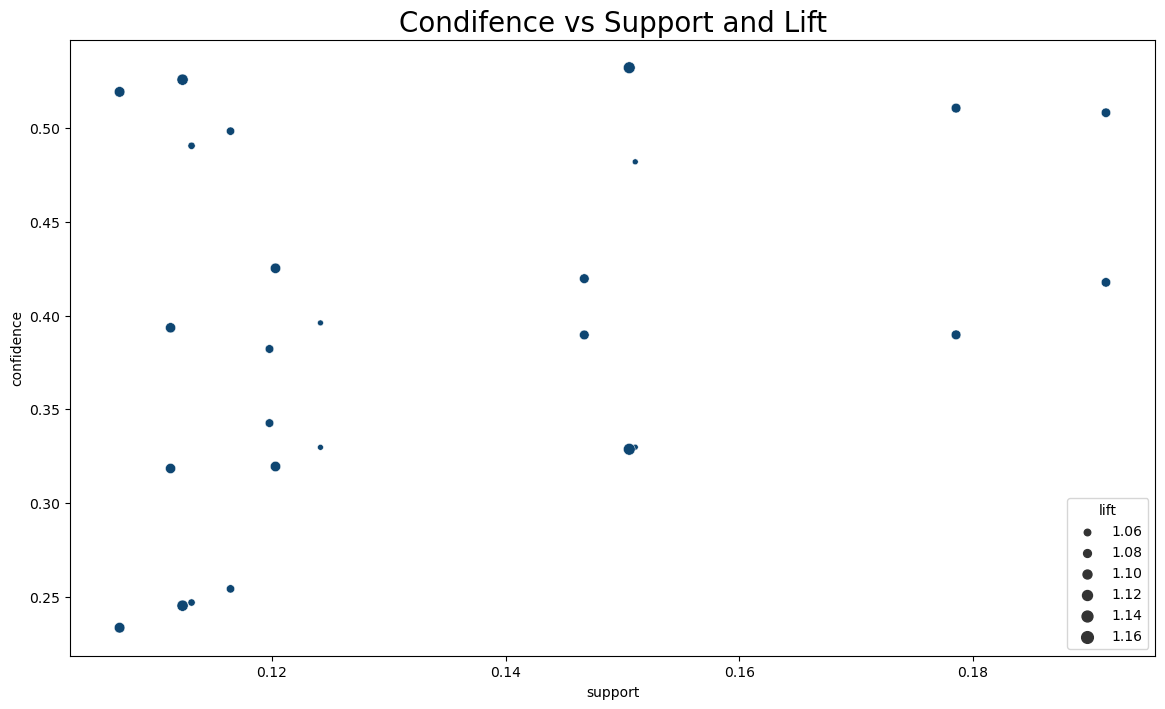

In [21]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(14,8))
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = rules, color='#0E4672')
plt.title('Condifence vs Support and Lift', size=20)
plt.show()

**Observation:**

> Note that almost all observations have a support less than 0.16. Pruning support would not be a good idea beacause we would lose valuable data.

In [22]:
# Replace frozen sets with strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

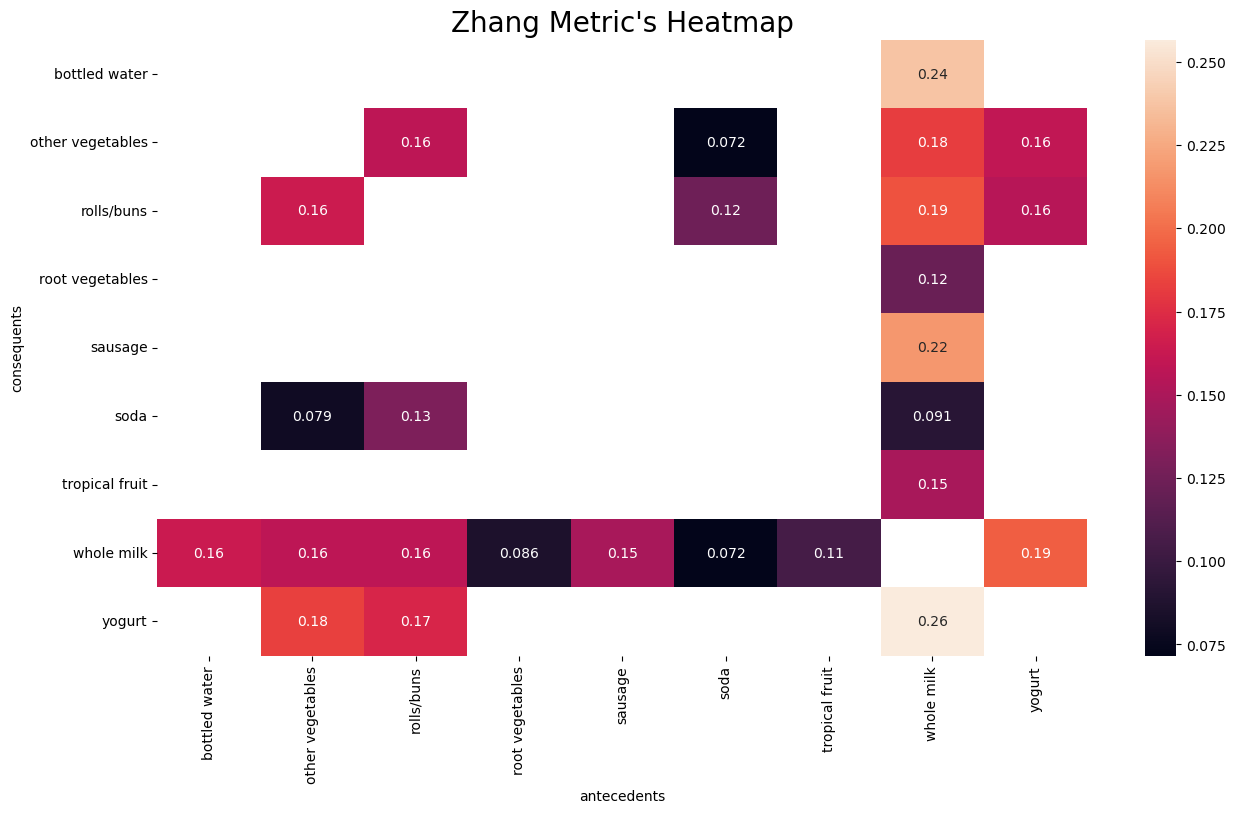

In [23]:
# Transform data to matrix format and generate heatmap 
pivot = rules.pivot(index='consequents', columns='antecedents', 
                    values='zhang')
plt.figure(figsize=(15,8))
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.title("Zhang Metric's Heatmap", size=20)
plt.show()

**Observation:**

> In this case Zhang's metric could be a good indicator of strong association between two items. We can use pruning to to a value of 0.15.

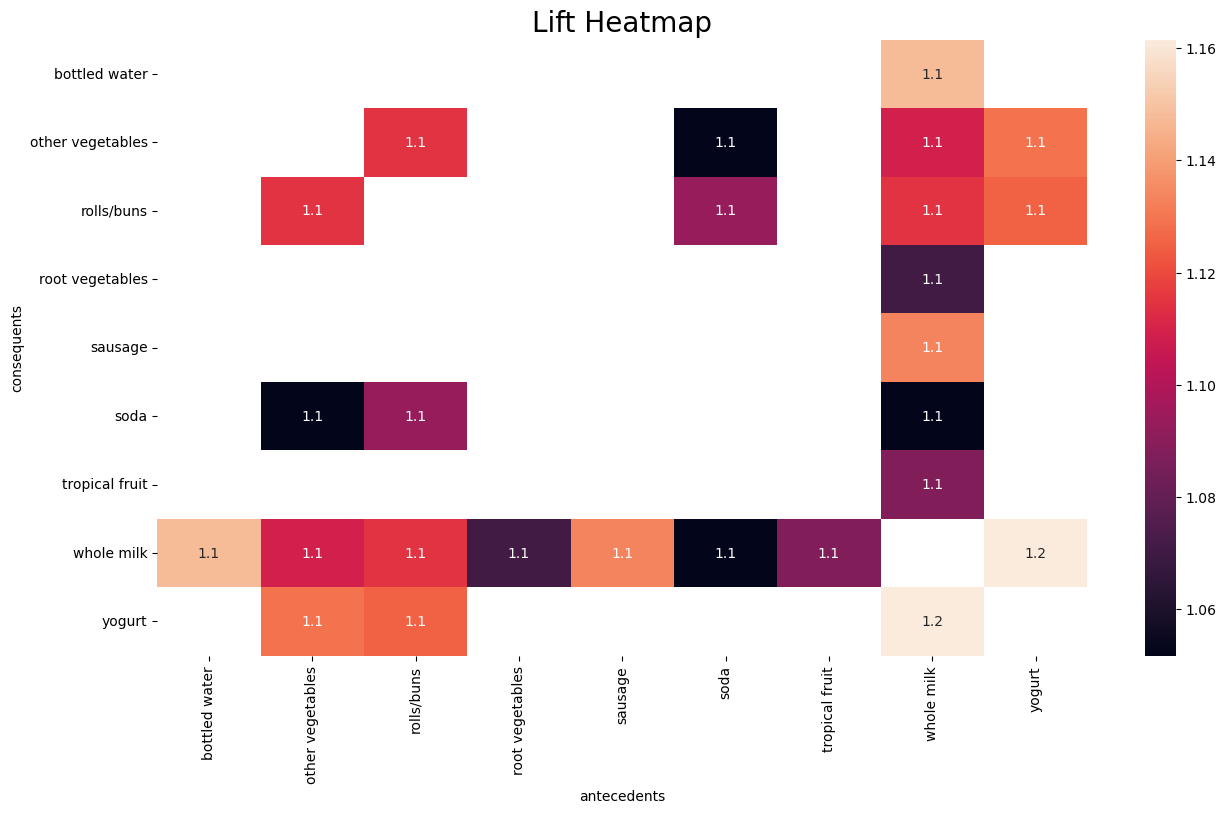

In [24]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                   columns = 'antecedents', 
                    values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(15,8))
sns.heatmap(pivot, annot = True, cbar=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("Lift Heatmap", size=20)
plt.show()

**Observation:**

> Not much difference between lift. However, the association between all items is stronger than expected by chance.

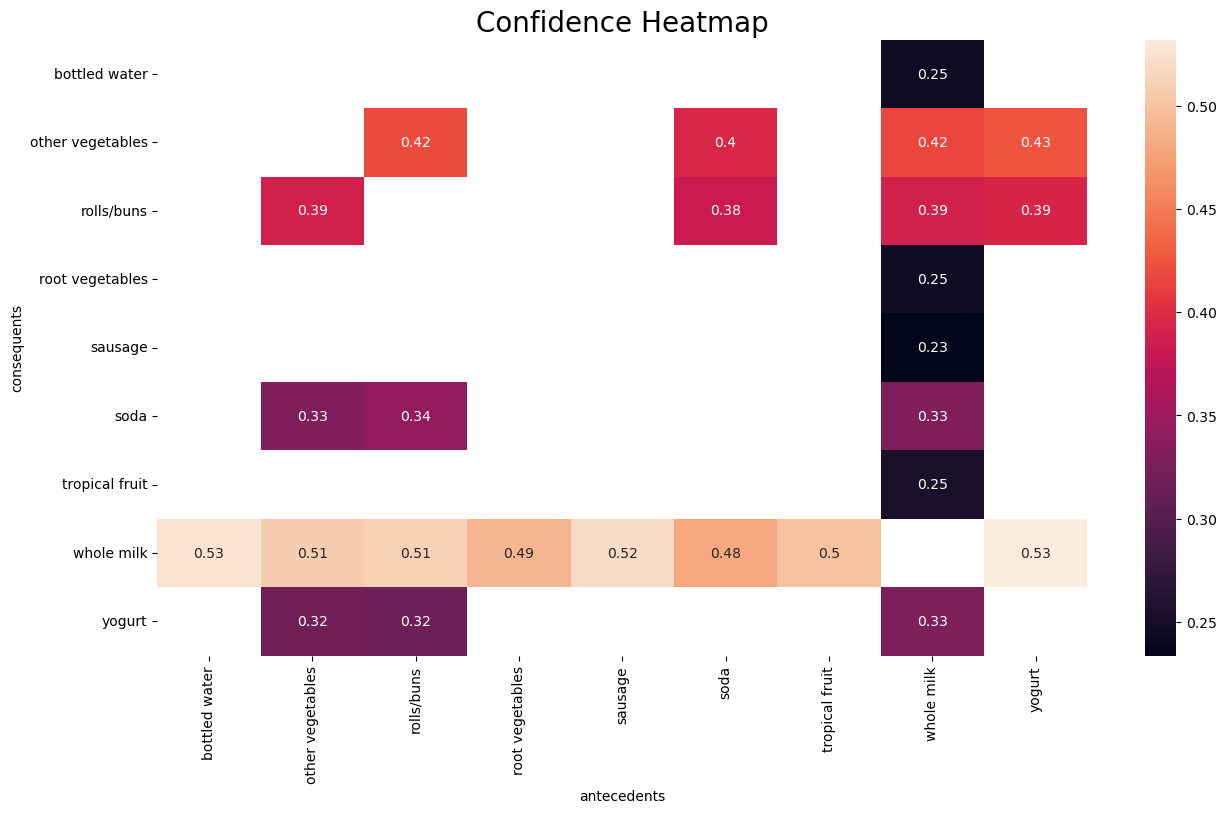

In [25]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                   columns = 'antecedents', 
                    values= 'confidence')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(15,8))
sns.heatmap(pivot, annot = True, cbar=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("Confidence Heatmap", size=20)
plt.show()

**Observation:**

> We can use pruning with a calue of 0.35 in order to find the percentage of times that the second item appears in a rule.

In [26]:
prunned_rules = rules[(rules['zhang'] >= 0.15) & (rules['confidence'] >= 0.35)]
prunned_rules.sort_values('zhang', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
7,yogurt,whole milk,0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
2,whole milk,rolls/buns,0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
0,whole milk,other vegetables,0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
9,other vegetables,rolls/buns,0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502,0.164589
21,bottled water,whole milk,0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
13,yogurt,other vegetables,0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553,0.159406
3,rolls/buns,whole milk,0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
1,other vegetables,whole milk,0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
8,rolls/buns,other vegetables,0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197,0.157772
23,yogurt,rolls/buns,0.282966,0.349666,0.111339,0.393472,1.125279,0.012396,1.072224,0.155267


**Observation:**

> These are the top then rules found in the data.

In [27]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents']#.apply(lambda antecedent: list(antecedent)[0:])
    rules['consequent'] = rules['consequents']#.apply(lambda consequent: list(consequent)[0:])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

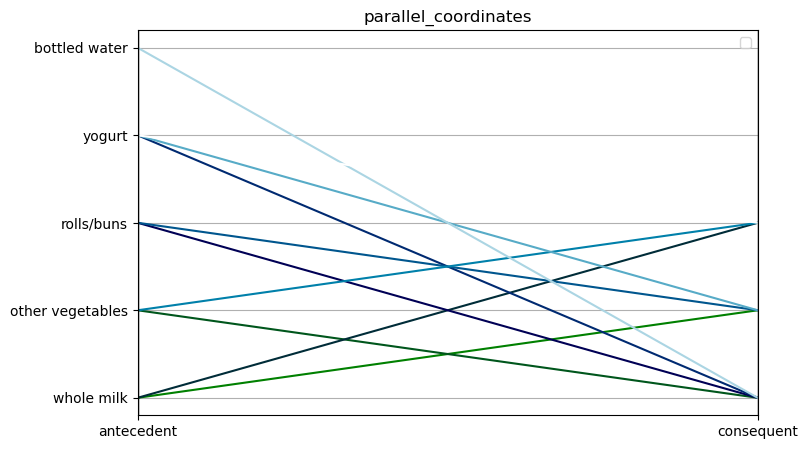

In [28]:
from pandas.plotting import parallel_coordinates

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(prunned_rules)

plt.figure(figsize=(8,5))
# Generate parallel coordinates plot
parallel_coordinates(coords, 'rule', colormap = 'ocean')
plt.legend([])
plt.title('parallel_coordinates')
plt.show()

**Observations:**

> Note that `rolls/buns`, `whole milk`, `other begetables` are more likely to be the consequent item.

<a id="5"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSIONS</p>

**After performing the Market Basket Analysis (MBA), we can conclude the next points:**

1. Using a min_support of 0.1 and prunning the data using Zhang's metric greater or equal to 0.15 and Confidence greater or equal to 0.35.
2. The most common item rules in the analysis are: Other Vegetables, Whole Milk, Rolls/Buns, Yogurt, Bottled Water.
3. After prunning rules we/ve found the top 10 rules.
4. `rolls/buns`, `whole milk`, `other begetables` are more likely to be the consequent item.

<a id="6"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">RECOMMENDATIONS</p>

1. These rules can be a good indicator to create "On Sale" promotions in order to increase sales.
2. Apply a recommendation engine to the end user.